In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("max_columns",None)

In [3]:
df=pd.read_excel("World military power.xlsx")

In [4]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Ango

In [5]:
df.iloc[0].values

array(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet', 'Trainer Aircraft Fleet value',
       'Helicopter Fleet Strength', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength', 'Towed Artillery Strength value',
       'Rocket Projector Strength', 'Rocket Projector Strength value',
       'Navy Fleet Strengths', 'Navy Fleet Strengths value',
       'Aircraft Carr

In [6]:
cols=['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet', 'Trainer Aircraft Fleet value',
       'Helicopter Fleet Strength', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength', 'Towed Artillery Strength value',
       'Rocket Projector Strength', 'Rocket Projector Strength value',
       'Navy Fleet Strengths', 'Navy Fleet Strengths value',
       'Aircraft Carrier Fleet Strength',
       'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength', 'Submarine Fleet Strength value',
       'Destroyer Fleet Strength', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength', 'Frigate Fleet Strength value',
       'defense spending budget', 'defense spending budget value',
       'External Debt', 'External Debt value', 'Airport Totals',
       'Airport Totals value', 'Oil Production', 'Oil Production value',
       'Oil Consumption', 'Oil Consumption value', 'Proven Oil Reserves',
       'Proven Oil Reserves value', 'Available Manpower',
       'Available Manpower value', 'Total Population',
       'Total Population value', 'Total Square Land Area',
       'Total Square Land Area value', 'Total Coastline Coverage',
       'Total Coastline Coverage value', 'Total Waterway Coverage',
       'Total Waterway Coverage value', 'Total Border Coverage',
       'Total Border Coverage value']

In [7]:
df.rename(columns={df.columns[i]:cols[i] for i in range(len(df.columns))},inplace=True)

In [8]:
df.drop(0,axis=0,inplace=True)

In [9]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [10]:
df.shape

(138, 60)

In [11]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [12]:
df=df.fillna(0.0)

In [13]:
alll=df.iloc[:,1::2]

In [14]:
helper=alll.copy()

In [15]:
a=df.iloc[:,0]

In [16]:
alll=alll.T.append(a)

In [17]:
alll=alll.T

In [18]:
alll.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Military Strength
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0,Afghanistan
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0,Albania
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0,Algeria
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0,Angola
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0,Argentina


In [19]:
for i in alll.select_dtypes("object").columns:
    if i=="Military Strength":
        break
    else:
        alll[i]=alll[i].astype("str").str.replace(",","").astype("float")

In [20]:
"""for i in x.columns:
    if i=="Military Strength":
        break
    else:
        x[i]=x[i].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(float)"""

'for i in x.columns:\n    if i=="Military Strength":\n        break\n    else:\n        x[i]=x[i].astype(\'str\').str.extractall(\'(\\d+)\').unstack().fillna(\'\').sum(axis=1).astype(float)'

In [21]:
alll.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Military Strength
1,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,Afghanistan
2,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,Albania
3,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,Algeria
4,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,Angola
5,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,Argentina


In [22]:
alll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

In [23]:
alll.isnull().sum()

Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

In [24]:
alll=pd.get_dummies(alll)

In [25]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(alll)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(alll,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 2,silhouette0.9227153206136329
Number of cluster 3,silhouette0.8995442950361631


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 4,silhouette0.8671436271439987
Number of cluster 5,silhouette0.8675195540746111


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 6,silhouette0.7789462745536555
Number of cluster 7,silhouette0.7817947546427708


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 8,silhouette0.7847423623940264
Number of cluster 9,silhouette0.7809562458841909
Number of cluster 10,silhouette0.6795886784648338


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


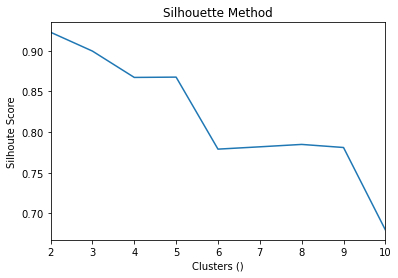

In [26]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(2,10)
plt.show()

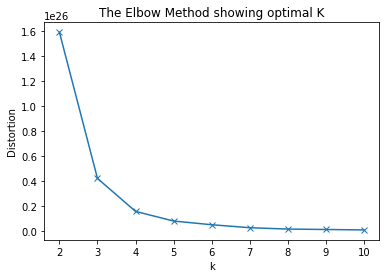

In [27]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 

In [28]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz
model=model.fit(alll)
pred=model.predict(alll)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
alll["Type of Countries"]=pred
alll["Countries"]=df.iloc[:,0]

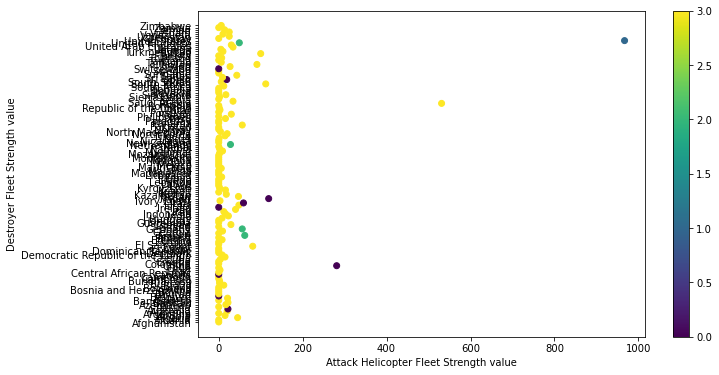

In [64]:
import random
i=random.choice(helper.columns)
a=random.choice(helper.columns)
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(alll[i],alll["Countries"],c=pred)
plt.xlabel(i)
plt.ylabel(a)
plt.colorbar()
plt.show()

In [31]:
alll.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Military Strength_Afghanistan,Military Strength_Albania,Military Strength_Algeria,Military Strength_Angola,Military Strength_Argentina,Military Strength_Armenia,Military Strength_Australia,Military Strength_Austria,Military Strength_Azerbaijan,Military Strength_Bahrain,Military Strength_Bangladesh,Military Strength_Belarus,Military Strength_Belgium,Military Strength_Bhutan,Military Strength_Bolivia,Military Strength_Bosnia and Herzegovina,Military Strength_Botswana,Military Strength_Brazil,Military Strength_Bulgaria,Military Strength_Burkina Faso,Military Strength_Cambodia,Military Strength_Cameroon,Military Strength_Canada,Military Strength_Central African Republic,Military Strength_Chad,Military Strength_Chile,Military Strength_China,Military Strength_Colombia,Military Strength_Croatia,Military Strength_Cuba,Military Strength_Czechia,Military Strength_Democratic Republic of the Congo,Military Strength_Denmark,Military Strength_Dominican Republic,Military Strength_Ecuador,Military Strength_Egypt,Military Strength_El Salvador,Military Strength_Estonia,Military Strength_Ethiopia,Military Strength_Finland,Military Strength_France,Military Strength_Gabon,Military Strength_Georgia,Military Strength_Germany,Military Strength_Ghana,Military Strength_Greece,Military Strength_Guatemala,Military Strength_Honduras,Military Strength_Hungary,Military Strength_India,Military Strength_Indonesia,Military Strength_Iran,Military Strength_Iraq,Military Strength_Ireland,Military Strength_Israel,Military Strength_Italy,Military Strength_Ivory Coast,Military Strength_Japan,Military Strength_Jordan,Military Strength_Kazakhstan,Military Strength_Kenya,Military Strength_Kuwait,Military Strength_Kyrgyzstan,Military Strength_Laos,Military Strength_Latvia,Military Strength_Lebanon,Military Strength_Liberia,Military Strength_Libya,Military Strength_Lithuania,Military Strength_Madagascar,Military Strength_Malaysia,Military Strength_Mali,Military Strength_Mauritania,Military Strength_Mexico,Military Strength_Moldova,Military Strength_Mongolia,Military Strength_Montenegro,Military Strength_Morocco,Military Strength_Mozambique,Military Strength_Myanmar,Military Strength_Namibia,Military Strength_Nepal,Military Strength_Netherlands,Military Strength_New Zealand,Military Strength_Nicaragua,Military Strength_Niger,Military Strength_Nigeria,Military Strength_North Korea,Military Strength_North Macedonia,Military Strength_Norway,Military Strength_Oman,Military Strength_Pakistan,Military Strength_Panama,Military Strength_Paraguay,Military Strength_Peru,Military Strength_Philippines,Military Strength_Poland,Military Strength_Portugal,Military Strength_Qatar,Military Strength_Republic of the Congo,Military Strength_Romania,Military Strength_Russia,Military Strength_Saudi Arabia,Military Strength_Serbia,Military Strength_Sierra Leone,Military Strength_Singapore,Military Strength_Slovakia,Military Strength_Slovenia,Military Strength_Somalia,Military Strength_South Africa,Military Strength_South Korea,Military Strength_South Sudan,Military Strength_Spain,Military Strength_Sri Lanka,Military Strength_Sudan,Military St

In [32]:
air=alll.iloc[:,1:8]

In [33]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(air)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(air,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 2,silhouette0.9590312342308895
Number of cluster 3,silhouette0.8291423867209964


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 4,silhouette0.7544330974160272
Number of cluster 5,silhouette0.6933735803347325


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 6,silhouette0.6193293389056403
Number of cluster 7,silhouette0.6144027210423382
Number of cluster 8,silhouette0.5485647958484963


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 9,silhouette0.5408077041068218
Number of cluster 10,silhouette0.5361677946210566


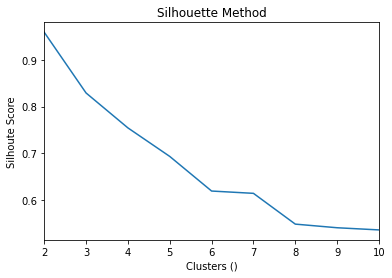

In [34]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(2,10)
plt.show()

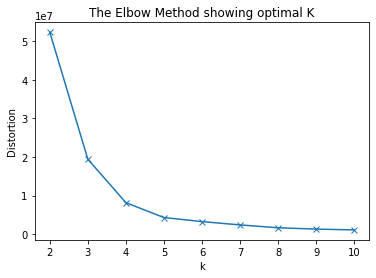

In [35]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 

In [36]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz
model=model.fit(air)
pred=model.predict(air)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
air["Type of Countries"]=pred
air["Countries"]=df.iloc[:,0]

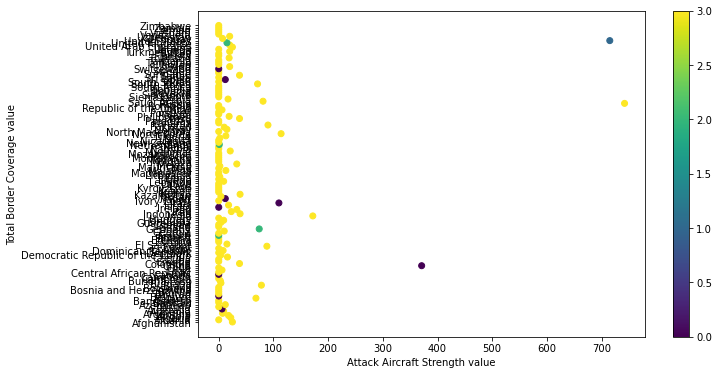

In [63]:
import random
i=random.choice(air.columns)

#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(air[i],air["Countries"],c=pred)
plt.xlabel(i)
plt.ylabel(a)
plt.colorbar()
plt.show()

In [39]:
earth=alll.iloc[:,8:13]

In [40]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(earth)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(earth,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 2,silhouette0.9038239811815656
Number of cluster 3,silhouette0.7986782786890192


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 4,silhouette0.6799209133917918
Number of cluster 5,silhouette0.674746238961445


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 6,silhouette0.5661410707396208
Number of cluster 7,silhouette0.5651163226450535


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 8,silhouette0.5615014582623726
Number of cluster 9,silhouette0.5166824229473241
Number of cluster 10,silhouette0.4841424377086353


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


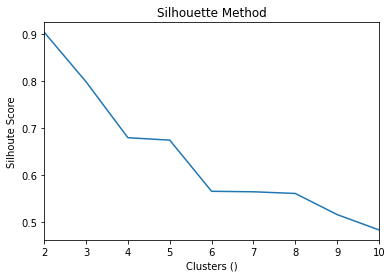

In [41]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(2,10)
plt.show()

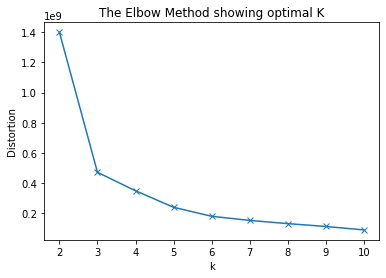

In [42]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 

In [43]:
model=KMeans(n_clusters=3)#4 tane sınıfa ayırcağınızı söylüyorsunuz
model=model.fit(earth)
pred=model.predict(earth)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
earth["Type of Countries"]=pred
earth["Countries"]=df.iloc[:,0]

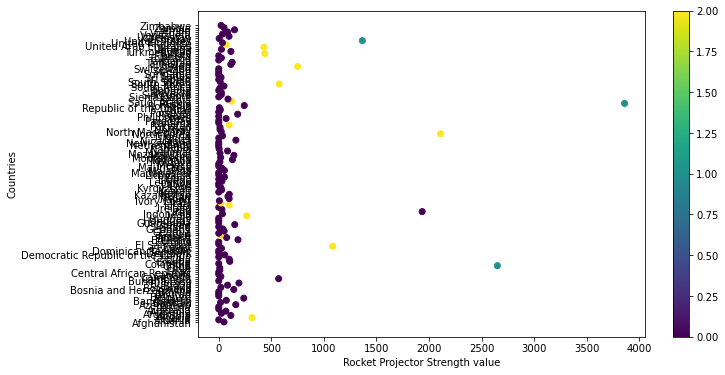

In [45]:
import random
i=random.choice(earth.columns)
a=random.choice(earth.columns)
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(earth[i],earth[a],c=pred)
plt.xlabel(i)
plt.ylabel(a)
plt.colorbar()
plt.show()

In [46]:
navy=alll.iloc[:,13:18]

In [47]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(navy)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(navy,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 2,silhouette0.8511840050206101
Number of cluster 3,silhouette0.7766713219189312
Number of cluster 4,silhouette0.7560982690730471


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 5,silhouette0.6326354082223082


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 6,silhouette0.6174397530082723
Number of cluster 7,silhouette0.6112575657288035


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 8,silhouette0.6077137951980831
Number of cluster 9,silhouette0.592623111793053


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 10,silhouette0.5855373781523062


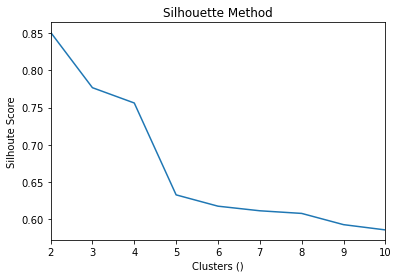

In [48]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(2,10)
plt.show()

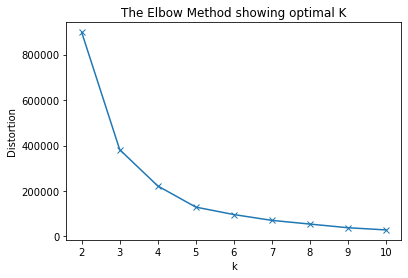

In [49]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 

In [50]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz
model=model.fit(navy)
pred=model.predict(navy)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
navy["Type of Countries"]=pred
navy["Countries"]=df.iloc[:,0]

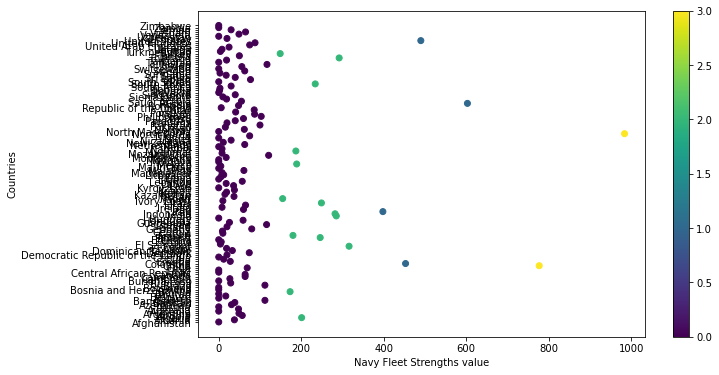

In [52]:
import random
i=random.choice(navy.columns)
a=random.choice(navy.columns)
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(navy[i],navy[a],c=pred)
plt.xlabel(i)
plt.ylabel(a)
plt.colorbar()
plt.show()

In [53]:
general=alll.iloc[:,18:30]

In [54]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model=model.fit(x)
        pred=model.fit_predict(general)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(general,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 2,silhouette0.9227153206136329
Number of cluster 3,silhouette0.8995442950361632


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 4,silhouette0.8671436271439988
Number of cluster 5,silhouette0.8675195540746111


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 6,silhouette0.7789462745536561
Number of cluster 7,silhouette0.7817947546427715


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 8,silhouette0.7847423623940271
Number of cluster 9,silhouette0.6833747949746714
Number of cluster 10,silhouette0.6795886784648357


C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


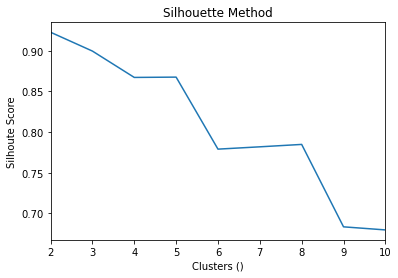

In [55]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters ()")
plt.ylabel("Silhoute Score")
plt.title("Silhouette Method")
plt.xlim(2,10)
plt.show()

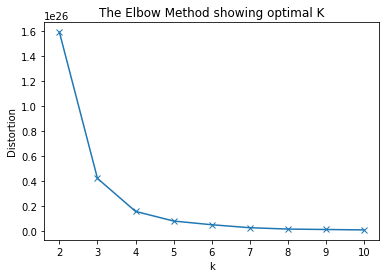

In [56]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()#dirsek metodunda nerden kırılıyorsa o sayıda sınıfa bölmek en iyisi olur diyoruz bu örnek için 4 mesela 

In [57]:
model=KMeans(n_clusters=4)#4 tane sınıfa ayırcağınızı söylüyorsunuz
model=model.fit(general)
pred=model.predict(general)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
general["Type of Countries"]=pred
general["Countries"]=df.iloc[:,0]

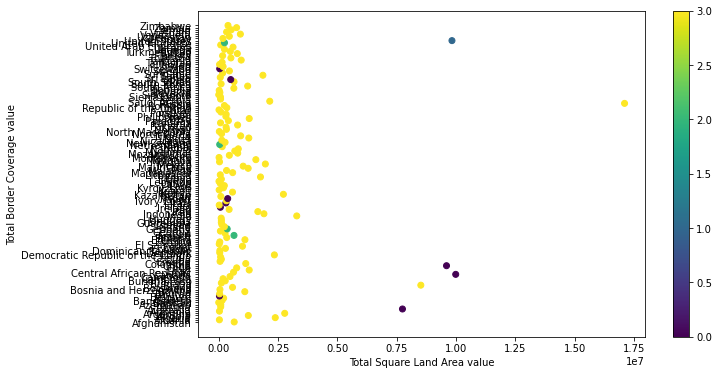

In [60]:
import random
i=random.choice(general.columns)
a=random.choice(general.columns)
#burda ayırmış olduğumuz 4 farklı grup için renklendirilmiş verisini görüyoruz
plt.figure(figsize=(10,6))
plt.scatter(general[i],general["Countries"],c=pred)
plt.xlabel(i)
plt.ylabel(a)
plt.colorbar()
plt.show()